<a href="https://colab.research.google.com/github/kkktim/Colab/blob/master/Ch01.%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EA%B8%B0%EC%B4%88%20/%206_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
"""
날짜 : 2022/04/27
이름 : 강태호
내용 : 파이썬 데이터분석 실습하기
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 불러오기
df_koweps = pd.read_csv('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/koweps_2015.csv', encoding='euc-kr')
df_koweps

In [5]:
#데이터 크기 확인
df_koweps.shape

(16664, 958)

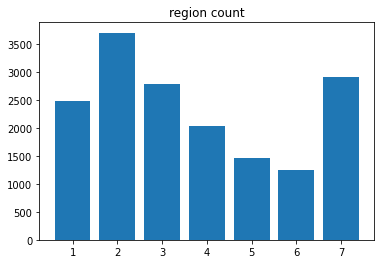

In [27]:
###############################################################
#분석주제1.지역별 인구수 분석(지역컬럼:h10_reg7 - 1:서울, 2:경기/인천, 3:부산/경남, 4:대구/경북, 5:대전/충남, 6:강원/충북, 7:광주/전남/전북/제주)
df_local = df_koweps.loc[:, ['h10_reg7']]

counts = []
for i in range(1, 8):
  count = df_local[df_local.h10_reg7 == i].h10_reg7.count()
  counts.append(count)

counts

#시각화
plt.title("region count")
plt.bar(['1', '2', '3', '4', '5', '6', '7'],
        counts)
plt.show()

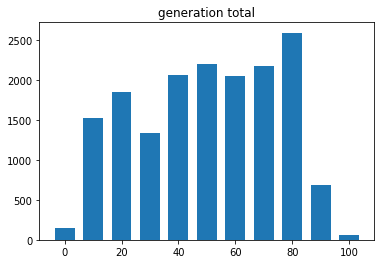

In [39]:
###############################################################
#분석주제2.나이대 별 인구 분석(나이컬럼:h10_g4)
df_age = df_koweps.loc[:, ['h10_g4', 'h10_g11']]

#파생변수 age, gen 생성
df_age['age'] = 2022 - df_age.h10_g4

df_age['gen'] = [0 if 0 <= a < 10 else 
                 10 if 10 <= a < 20 else 
                 20 if 20 <= a < 30 else 
                 30 if 30 <= a < 40 else 
                 40 if 40 <= a < 50 else 
                 50 if 50 <= a < 60 else 
                 60 if 60 <= a < 70 else 
                 70 if 70 <= a < 80 else 
                 80 if 80 <= a < 90 else 
                 90 if 90 <= a < 100 else 100 for a in df_age['age']]

df_result = df_age.groupby(by='gen', as_index=False)['h10_g4'].count().rename(columns={'h10_g4':'total'})
df_result

#시각화
plt.title('generation total')
plt.bar(df_result['gen'], df_result['total'], width=7)
plt.show()

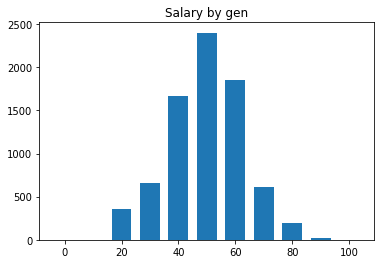

In [64]:
###############################################################
#분석주제3.나이대 별 소득분포(소득컬럼:p1002_8aq1)
df_income = df_koweps.loc[:,['h10_g3', 'h10_g4', 'h10_eco9', 'p1002_8aq1']]
df_income.columns=['gender', 'birth', 'job', 'salary']
df_income

#결측치 처리
df_income = df_income.fillna(0)

#나이 파생변수 추가
df_income['age'] = 2022 - df_income.birth
df_income

#gen 파생변수 추가
df_income['gen'] = [0 if 0 <= a < 10 else 
                 10 if 10 <= a < 20 else 
                 20 if 20 <= a < 30 else 
                 30 if 30 <= a < 40 else 
                 40 if 40 <= a < 50 else 
                 50 if 50 <= a < 60 else 
                 60 if 60 <= a < 70 else 
                 70 if 70 <= a < 80 else 
                 80 if 80 <= a < 90 else 
                 90 if 90 <= a < 100 else 100 for a in df_income['age']]

df_income_mean = df_income.groupby('gen')['salary'].mean().reset_index()
df_income_mean

#시각화
plt.title('Salary by gen')
plt.bar(df_income['gen'], df_income['salary'], width=7)
plt.show()